In [1]:
import matplotlib.pyplot as plt 

In [2]:
from main import PSO_algorithm
from FitnessEvaluators import SphereEvaluator, RastriginEvaluator, RosenbrockEvaluator
from InertiaStrategys import ConstantIntertia, LinearDescentInertia

In [3]:
def plot_cenario(X, Y, evaluator, inertiaStrategy, constantIntertiaValue, lowerBoundLD, upperBoundLD):
    plt.figure()
    plt.plot(X,Y)

    if type(inertiaStrategy).__name__ == 'LinearDescentInertia':
        plt.title(f'Convergence graphic for {type(evaluator).__name__} and {type(inertiaStrategy).__name__} with bounds {lowerBoundLD, upperBoundLD}')
    else:
        plt.title(f'Convergence graphic for {type(evaluator).__name__} and {type(inertiaStrategy).__name__} using constant intertia: {constantIntertiaValue}')
    plt.xlabel('Iterations')
    plt.ylabel('Best fitness')
    plt.show()

In [4]:
NUMBER_ITERATIONS = 500
LEFT_BOUND = -100
RIGHT_BOUND = 100
DIMENSION = 30
POPULATION_SIZE = 100

constantIntertiaValues = [0.7, 0.8, 0.9]
upperBoundLinearDesc = [1, 0.9, 0.8]
lowerBoundLinearDesc = [0.3, 0.4, 0.5]

evaluators = [SphereEvaluator(), RastriginEvaluator(), RosenbrockEvaluator()]
inertiaStrategies = [LinearDescentInertia(0.4, 0.9, NUMBER_ITERATIONS), ConstantIntertia(0)]

In [5]:
def avarage(lst): 
    return sum(lst) / len(lst) 

def execute_X_times(X_TIMES, NUMBER_ITERATIONS, LEFT_BOUND, RIGHT_BOUND, DIMENSION, POPULATION_SIZE, evaluator, inertiaStrategy):
    Y_results = []
    X_results = []

    for i in range(X_TIMES):
        X, Y = PSO_algorithm(NUMBER_ITERATIONS, LEFT_BOUND, RIGHT_BOUND, DIMENSION, POPULATION_SIZE, evaluator, inertiaStrategy)
        if i == 0:
            X_results = X

        Y_results.append(Y)

    Y_mean = []

    for i in range(len(Y_results[0])):
        Y_values = [curr_result[i] for curr_result in Y_results]

        Y_mean.append(avarage(Y_values))
    
    print(Y_results)
    print(Y_mean)
    return X_results, Y_mean

[[60083.0272521995, 91856.5658042439, 109879.35817474485, 116169.65914902497, 108779.98204120173, 116982.97776379721, 106756.59902300604, 83692.78207998513, 74413.04547045172, 72710.9705713331, 95912.66452762885, 89930.19825037409, 90051.06221218375, 91192.66959615717, 83018.48565916385, 75821.89860008824, 70934.2873781775, 87206.66807913897, 92847.5466018812, 85989.58979735425, 81164.63879260795, 77137.37598241866, 72714.76181998014, 74032.31428711221, 75403.83322873856, 71076.66566293864, 72576.08451833768, 73487.39709890803, 85580.15246778111, 83147.26025721249, 84127.46312918907, 76906.86731129323, 76604.55798415143, 60281.99112965335, 74292.4039230367, 76940.92179228115, 75197.85373825731, 79125.23737494735, 67983.34275557952, 75641.82169436716, 74781.10315946532, 73782.2444801124, 61905.40797841176, 76807.81415028029, 81636.08684927171, 66683.73867389525, 67204.74799523133, 70568.47944397276, 72900.9410618977, 63211.29314032784, 69327.88943598558, 67830.93960581554, 66143.3669540

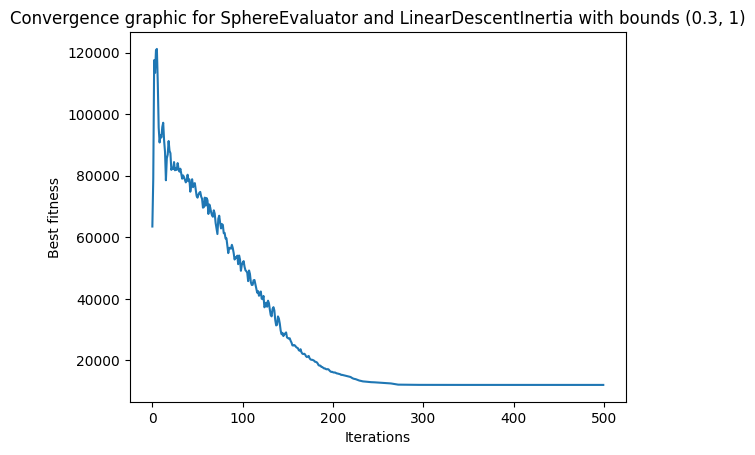

[[51003.09695183513, 75878.83714499706, 127395.82367023968, 94949.63565188687, 116644.69520521798, 117381.93179353053, 107493.33563547333, 81939.76499424147, 85897.20467222064, 87771.46254185658, 90208.77030048218, 86543.93144320561, 106522.47886121969, 87816.00812387763, 75213.68444466456, 81308.41056793183, 76205.608736134, 78918.73950655709, 88695.52763015921, 68720.19122961858, 79835.65577895113, 75949.56565086878, 81534.03422210924, 84289.93699417742, 74960.04515922198, 77005.51260975977, 85897.1891944304, 77036.64252095639, 67082.86801913913, 78905.9395795202, 75971.77160798485, 68422.61297959425, 76600.3108948416, 76864.90491702758, 70144.21134530172, 68326.0963425859, 73207.50295842729, 72992.63208418056, 66599.99323066499, 59156.18363757506, 68648.18388604799, 64130.375128993684, 64842.21767957927, 69894.19356638908, 66873.68679838422, 68686.53846122313, 69871.05846465561, 59814.462887817805, 72492.50965990734, 67937.24504257241, 70258.5988120595, 65589.30600057372, 61052.6254

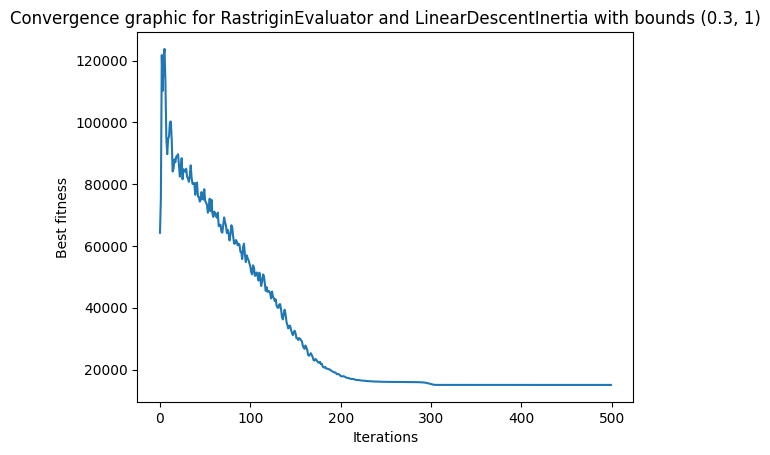

KeyboardInterrupt: 

In [6]:
for inertiaStrategy in inertiaStrategies:
    for constantIntertiaValue in constantIntertiaValues:
        for upperBoundLD in upperBoundLinearDesc:
            for lowerBoundLD in lowerBoundLinearDesc:
                for evaluator in evaluators:

                    if type(inertiaStrategy).__name__=='LinearDescentInertia':
                        inertiaStrategy = LinearDescentInertia(lowerBoundLD, upperBoundLD, NUMBER_ITERATIONS)
                        X, Y = execute_X_times(10, NUMBER_ITERATIONS, LEFT_BOUND, RIGHT_BOUND, DIMENSION, POPULATION_SIZE, evaluator, inertiaStrategy)
                        plot_cenario(X,Y, evaluator, inertiaStrategy, constantIntertiaValue, lowerBoundLD, upperBoundLD)
                    else:
                        inertiaStrategy = ConstantIntertia(constantIntertiaValue)
                        X, Y = execute_X_times(10, NUMBER_ITERATIONS, LEFT_BOUND, RIGHT_BOUND, DIMENSION, POPULATION_SIZE, evaluator, inertiaStrategy)
                        plot_cenario(X,Y, evaluator, inertiaStrategy, constantIntertiaValue, lowerBoundLD, upperBoundLD)